In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

#from google.colab import drive
import glob

In [15]:
noise = glob.glob("OK_Drives_Images_Augmentation/*.png")
nonoise = glob.glob("NOK_Drives_Images_Augmentation/*.png")

In [18]:
len(noise)

500

In [21]:
len(nonoise)

500

In [25]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [29]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [32]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [35]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [38]:
X=X/255

In [41]:
# 250 x 400 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [45]:
model = Sequential()
model.add(Dense(units = 30, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                3000030   
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 3000450 (11.45 MB)
Trainable params: 3000450 (11.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
print(X.shape)
print(y.shape)
print(y)

(1000, 100000)
(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [60]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=50,epochs=500, shuffle='true')

Epoch 1/500
15/15 - 0s - loss: 0.6754 - accuracy: 0.5480 - 480ms/epoch - 32ms/step
Epoch 2/500
15/15 - 0s - loss: 0.6099 - accuracy: 0.6667 - 89ms/epoch - 6ms/step
Epoch 3/500
15/15 - 0s - loss: 0.5913 - accuracy: 0.6893 - 73ms/epoch - 5ms/step
Epoch 4/500
15/15 - 0s - loss: 0.5735 - accuracy: 0.6853 - 84ms/epoch - 6ms/step
Epoch 5/500
15/15 - 0s - loss: 0.5561 - accuracy: 0.7027 - 86ms/epoch - 6ms/step
Epoch 6/500
15/15 - 0s - loss: 0.5509 - accuracy: 0.7027 - 98ms/epoch - 7ms/step
Epoch 7/500
15/15 - 0s - loss: 0.5429 - accuracy: 0.7120 - 95ms/epoch - 6ms/step
Epoch 8/500
15/15 - 0s - loss: 0.5471 - accuracy: 0.6893 - 94ms/epoch - 6ms/step
Epoch 9/500
15/15 - 0s - loss: 0.5258 - accuracy: 0.7333 - 103ms/epoch - 7ms/step
Epoch 10/500
15/15 - 0s - loss: 0.5311 - accuracy: 0.7227 - 101ms/epoch - 7ms/step
Epoch 11/500
15/15 - 0s - loss: 0.5169 - accuracy: 0.7413 - 105ms/epoch - 7ms/step
Epoch 12/500
15/15 - 0s - loss: 0.5111 - accuracy: 0.7440 - 98ms/epoch - 7ms/step
Epoch 13/500
15/15 -

In [63]:
# resumen del model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 100001    
                                                                 
Total params: 100001 (390.63 KB)
Trainable params: 100001 (390.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'Epoca')

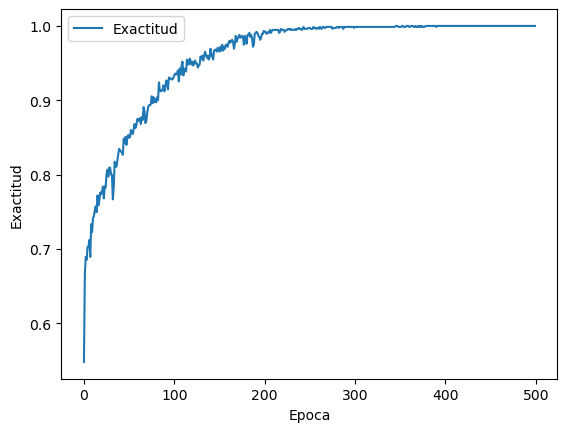

In [66]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

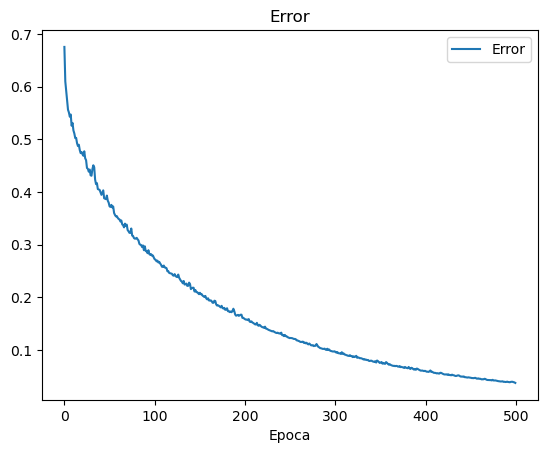

In [69]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

In [72]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test) > 0.5).astype("int32")

8/8 [==============================] - 0s 2ms/step


<Axes: >

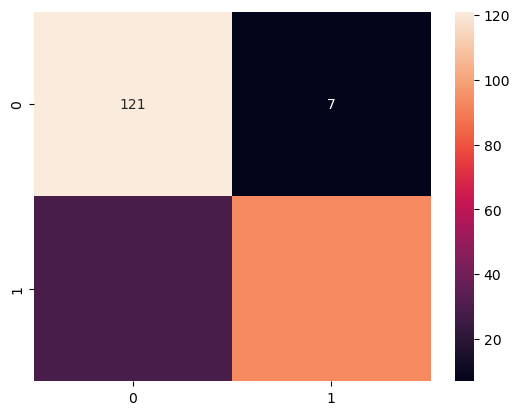

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")